In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Подготовка датасетов (отсеивание остатков)

In [16]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID(20x4).csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%Y-%m-%d')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
df_nemo

,76.04_8.72,76.84_10.72,76.04_10.72,75.24_10.72,76.84_12.72,76.04_12.72,75.24_12.72,76.04_14.72,75.24_14.72,76.04_16.72,...,77.64_26.72,76.84_26.72,76.04_26.72,75.24_26.72,77.64_28.72,76.84_28.72,76.04_28.72,76.84_30.72,76.84_32.72,dates
0,0.043625,0.020422,0.047565,0.029404,0.003458,0.092560,0.052151,-0.004117,0.022382,0.007686,...,0.018083,0.019788,-0.003431,-0.009815,0.009724,-0.009160,-0.012395,-0.006996,0.008986,2002-01-01
1,0.047393,0.023746,0.049272,0.033769,0.005018,0.096356,0.053323,-0.000530,0.021276,0.010792,...,0.022632,0.023539,0.003075,-0.000194,0.013870,-0.001995,-0.005301,0.000388,0.014536,2002-01-02
2,0.044247,0.011521,0.049129,0.022814,0.010857,0.097271,0.033787,-0.018142,0.011630,-0.005681,...,0.010347,0.001088,-0.008400,-0.006613,0.006939,-0.011129,-0.017642,-0.004274,0.003871,2002-01-03
3,0.062146,0.038022,0.068821,0.034043,0.027169,0.103096,0.047187,0.006027,0.031988,0.012539,...,0.015262,0.013042,-0.008172,-0.010695,0.013597,-0.006079,-0.014887,-0.010944,0.001652,2002-01-04
4,0.072028,0.049916,0.083135,0.042977,0.030714,0.109638,0.064967,0.019700,0.040898,0.016081,...,0.025431,0.025839,0.016494,0.008002,0.026036,0.007895,0.007914,-0.000113,0.019461,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.039327,0.045528,0.036132,0.070488,0.029018,0.065432,0.047599,0.055863,0.031723,0.076760,...,0.081824,0.095218,0.085243,0.075528,0.078301,0.094870,0.091462,0.102804,0.094042,2002-12-28
362,0.035425,0.040966,0.037730,0.064962,0.035383,0.071961,0.042368,0.054212,0.022649,0.071978,...,0.080725,0.095761,0.085406,0.073137,0.077812,0.095748,0.088964,0.098624,0.090550,2002-12-29
363,0.032043,0.035365,0.040945,0.060793,0.037407,0.064254,0.039702,0.052766,0.019930,0.062515,...,0.087484,0.102800,0.089072,0.073757,0.083672,0.101643,0.095456,0.097769,0.092106,2002-12-30
364,0.030746,0.030933,0.044543,0.057081,0.035254,0.046410,0.039763,0.047432,0.019348,0.058664,...,0.092134,0.106472,0.084838,0.070836,0.088574,0.104178,0.092674,0.096366,0.094340,2002-12-31


In [19]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID(20x4).csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

,76.04_8.72,76.84_10.72,76.04_10.72,75.24_10.72,76.84_12.72,76.04_12.72,75.24_12.72,76.04_14.72,75.24_14.72,76.04_16.72,...,77.64_26.72,76.84_26.72,76.04_26.72,75.24_26.72,77.64_28.72,76.84_28.72,76.04_28.72,76.84_30.72,76.84_32.72,dates
0,0.034992,0.016958,0.009720,-0.001750,0.009038,0.007889,-0.007242,-0.007944,-0.005034,-0.014921,...,0.023100,-0.000872,-0.008191,-0.019869,0.018493,-0.001989,-0.005848,-0.020535,0.001356,2002-01-01
1,0.058270,0.042173,0.036702,0.023623,0.035705,0.037181,0.020777,0.023757,0.025204,0.013618,...,0.048055,0.025248,0.019895,0.010983,0.048041,0.030079,0.030749,0.022316,0.049706,2002-01-02
2,0.062436,0.047277,0.043468,0.029177,0.040548,0.043036,0.026623,0.027308,0.028141,0.013978,...,0.060137,0.032853,0.012576,-0.023928,0.052728,0.031040,0.010645,0.012881,0.025435,2002-01-03
3,0.063424,0.048284,0.045603,0.029661,0.039782,0.044165,0.026890,0.026219,0.027957,0.012561,...,0.047818,0.027391,0.009091,0.001987,0.043810,0.018982,0.013497,-0.017130,0.004181,2002-01-04
4,0.056305,0.040442,0.035530,0.017736,0.028750,0.030878,0.013529,0.014120,0.014998,0.013821,...,0.051683,0.036860,0.026029,0.007951,0.052446,0.033440,0.029918,0.012275,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.041909,0.065143,0.049430,0.039997,0.040875,0.031277,0.053938,0.033211,0.078989,...,0.081267,0.088385,0.077588,0.070094,0.075973,0.086300,0.076895,0.080870,0.071904,2002-12-27
361,0.056429,0.039691,0.064340,0.051770,0.039537,0.039851,0.029469,0.052409,0.033064,0.075239,...,0.081302,0.092529,0.070229,0.067410,0.076235,0.081319,0.073393,0.059155,0.060337,2002-12-28
362,0.059627,0.040791,0.067532,0.056638,0.041125,0.042178,0.033426,0.053238,0.038548,0.068613,...,0.079316,0.089068,0.070665,0.070123,0.075711,0.080080,0.076564,0.059734,0.070495,2002-12-29
363,0.066121,0.051264,0.076209,0.064521,0.052194,0.051025,0.043247,0.063791,0.048730,0.076269,...,0.085897,0.098204,0.076889,0.077480,0.080958,0.086340,0.082537,0.067323,0.074877,2002-12-30


In [20]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

## Валидация с формированием набора предсказанных значений со всеми заблаговременностями для каждой ячейки test

In [21]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])
forc_n=105
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':
        print(column)
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forc_n:]
        test.index = df_rean['dates'][-forc_n:]
        data = df_rean[column][:-forc_n]
        data.index = df_rean['dates'][:-forc_n]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forc_n:]
        nemo_pr.index = df_nemo['dates'][-forc_n:]
        
        ARIMA_MSE_errors_list=[]
        ARIMA_MAE_errors_list=[]
        ARIMA_MAPE_errors_list=[]
        ARIMA_R2_errors_list=[]
        
        HYB_MSE_errors_list=[]
        HYB_MAE_errors_list=[]
        HYB_MAPE_errors_list=[]
        HYB_R2_errors_list=[]
        
        for j in range (forc_n): # для каждой ячейки из test
            #print(j)
            predictions_list=[]
            for i in range (forc_n): # для каждой из заблаговременностей
                data = df_rean[column][:-forc_n+j-i] # выделяем обучающую выборку
                f_size = i+1 # величина предсказания
                
                stlf = STLForecast(data, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
                model_res = stlf.fit()
                forecasts_i = model_res.forecast(f_size).tolist()[-1] # делаем предсказание и берем последнее значение
                predictions_list.append(forecasts_i)# добавляем предсказание в список предсказаний со всеми заблаговременостями
            
            real_val_list=np.full(forc_n, test[j]) # создаем массив верных значений
            nemo_real_val_list=np.full(forc_n, nemo_pr[j]) # создаем массив верных значений по NEMO
            
            HYB_pr=(predictions_list+nemo_real_val_list)/2 # добавляем к списку предсказаний значение NEMO и усредняем            
            
            
            # считаем ошибки как отклонения от реального значения
            ARIMA_MSE_errors_list.append(mean_squared_error(real_val_list, predictions_list))
            ARIMA_MAE_errors_list.append(mean_absolute_error(real_val_list, predictions_list))
            ARIMA_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-predictions_list)/real_val_list)*100,3))
            ARIMA_R2_errors_list.append(r2_score(real_val_list, predictions_list))
            
            HYB_MSE_errors_list.append(mean_squared_error(real_val_list, HYB_pr))
            HYB_MAE_errors_list.append(mean_absolute_error(real_val_list, HYB_pr))
            HYB_MAPE_errors_list.append(round(np.mean(np.abs(real_val_list-HYB_pr)/real_val_list)*100,3))
            HYB_R2_errors_list.append(r2_score(real_val_list, HYB_pr))
            
            '''
            print('Real Value: %s'%str(test[j]))
            plt.plot(np.arange(len(predictions_list)), predictions_list, label='prediction for timestep')
            plt.axhline(y=test[j], color='r', linestyle='-', label='real value')
            plt.xlabel("Заблаговременность прогноза (дни)")
            plt.legend()
            plt.grid()
            plt.show()
            '''
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': np.mean(ARIMA_MSE_errors_list),
                                      'MAE_ARIMA': np.mean(ARIMA_MAE_errors_list),
                                      'MAPE_ARIMA':np.mean(ARIMA_MAPE_errors_list),
                                      'R^2_ARIMA': np.mean(ARIMA_R2_errors_list),
                                      'MSE_HYB':np.mean(HYB_MSE_errors_list),
                                      'MAE_HYB':np.mean(HYB_MAE_errors_list),
                                      'MAPE_HYB':np.mean(HYB_MAPE_errors_list),
                                      'R^2_HYB':np.mean(HYB_R2_errors_list),
                                     } , ignore_index=True)
errors_df 

76.04_8.72
76.84_10.72
76.04_10.72
75.24_10.72
76.84_12.72
76.04_12.72
75.24_12.72
76.04_14.72
75.24_14.72
76.04_16.72
75.24_16.72
74.44_16.72
76.84_18.72
76.04_18.72
75.24_18.72
76.84_20.72
76.04_20.72
75.24_20.72
74.44_20.72
73.64_20.72
76.04_22.72
75.24_22.72
74.44_22.72
76.84_24.72
76.04_24.72
75.24_24.72
74.44_24.72
77.64_26.72
76.84_26.72
76.04_26.72
75.24_26.72
77.64_28.72
76.84_28.72
76.04_28.72
76.84_30.72
76.84_32.72


,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB
0,76.04_8.72,1.722487e-03,3.012803e-02,7.090755e+01,-1.588218e+31,4.901573e-04,1.703167e-02,3.761276e+01,-4.396024e+30
1,76.84_10.72,8.991099e-04,2.116545e-02,4.856786e+01,-1.026706e+31,3.832117e-04,1.560522e-02,3.338957e+01,-4.348254e+30
2,76.04_10.72,1.308513e-03,2.682932e-02,4.863716e+01,-1.087740e+31,7.237560e-04,2.232183e-02,3.772192e+01,-4.639163e+30
3,75.24_10.72,7.363435e-04,1.856581e-02,4.117041e+01,-7.167014e+30,2.144083e-04,1.134267e-02,2.671491e+01,-2.834487e+30
4,76.84_12.72,7.169047e-04,1.916175e-02,6.133033e+01,-1.658064e+31,3.290317e-04,1.402371e-02,4.063687e+01,-5.974015e+30
5,76.04_12.72,8.078302e-04,2.063249e-02,4.875006e+01,-9.105243e+30,3.239600e-04,1.437685e-02,3.312868e+01,-3.292940e+30
6,75.24_12.72,6.453560e-04,1.866147e-02,5.071885e+01,-9.444645e+30,2.474665e-04,1.224925e-02,3.431294e+01,-3.211506e+30
7,76.04_14.72,5.314791e-04,1.705145e-02,5.757000e+01,-7.890808e+30,3.444112e-04,1.484738e-02,4.676277e+01,-4.777390e+30
8,75.24_14.72,4.794992e-04,1.626352e-02,1.930670e+01,-1.492527e+31,2.559141e-04,1.281997e-02,-5.354714e+00,-1.193565e+31
9,76.04_16.72,6.868841e-04,1.979319e-02,3.360232e+01,-1.355186e+31,3.310976e-04,1.452727e-02,2.326253e+01,-5.291032e+30


In [22]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,1.722487e-03,3.012803e-02,7.090755e+01,-1.588218e+31,4.901573e-04,1.703167e-02,3.761276e+01,-4.396024e+30,-1.232330e-03,-1.309637e-02,-3.329479e+01,-1.148615e+31
1,76.84_10.72,8.991099e-04,2.116545e-02,4.856786e+01,-1.026706e+31,3.832117e-04,1.560522e-02,3.338957e+01,-4.348254e+30,-5.158983e-04,-5.560226e-03,-1.517829e+01,-5.918807e+30
2,76.04_10.72,1.308513e-03,2.682932e-02,4.863716e+01,-1.087740e+31,7.237560e-04,2.232183e-02,3.772192e+01,-4.639163e+30,-5.847574e-04,-4.507486e-03,-1.091524e+01,-6.238236e+30
3,75.24_10.72,7.363435e-04,1.856581e-02,4.117041e+01,-7.167014e+30,2.144083e-04,1.134267e-02,2.671491e+01,-2.834487e+30,-5.219352e-04,-7.223137e-03,-1.445550e+01,-4.332527e+30
4,76.84_12.72,7.169047e-04,1.916175e-02,6.133033e+01,-1.658064e+31,3.290317e-04,1.402371e-02,4.063687e+01,-5.974015e+30,-3.878729e-04,-5.138043e-03,-2.069347e+01,-1.060662e+31
5,76.04_12.72,8.078302e-04,2.063249e-02,4.875006e+01,-9.105243e+30,3.239600e-04,1.437685e-02,3.312868e+01,-3.292940e+30,-4.838702e-04,-6.255647e-03,-1.562138e+01,-5.812302e+30
6,75.24_12.72,6.453560e-04,1.866147e-02,5.071885e+01,-9.444645e+30,2.474665e-04,1.224925e-02,3.431294e+01,-3.211506e+30,-3.978895e-04,-6.412216e-03,-1.640590e+01,-6.233139e+30
7,76.04_14.72,5.314791e-04,1.705145e-02,5.757000e+01,-7.890808e+30,3.444112e-04,1.484738e-02,4.676277e+01,-4.777390e+30,-1.870679e-04,-2.204073e-03,-1.080723e+01,-3.113418e+30
8,75.24_14.72,4.794992e-04,1.626352e-02,1.930670e+01,-1.492527e+31,2.559141e-04,1.281997e-02,-5.354714e+00,-1.193565e+31,-2.235851e-04,-3.443551e-03,-1.395199e+01,-2.989623e+30
9,76.04_16.72,6.868841e-04,1.979319e-02,3.360232e+01,-1.355186e+31,3.310976e-04,1.452727e-02,2.326253e+01,-5.291032e+30,-3.557865e-04,-5.265914e-03,-1.033979e+01,-8.260823e+30


ValueError: Maximum allowed size exceeded

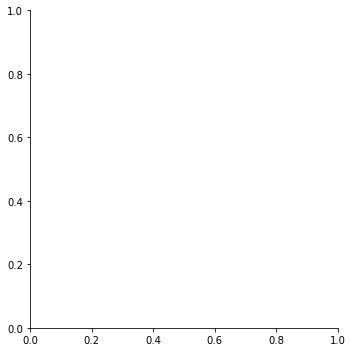

In [24]:
sns.displot(errors_df, x="MSE_DIF")

ValueError: Maximum allowed size exceeded

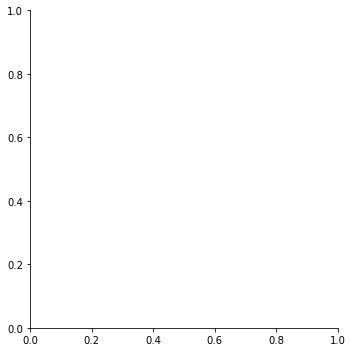

In [25]:
sns.displot(errors_df, x="MAE_DIF")

In [ ]:
sns.displot(errors_df, x="MAPE_DIF")

In [26]:
errors_df.to_csv('./timelines_data/errors_ARIMA_HYB_105_36_points.csv', sep=';', index=False)